#  8. Morfologické operácie

In [495]:
import numpy as np
from skimage import data, filters, draw
import matplotlib.pyplot as plt

from skimage.morphology import disk

In [496]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'

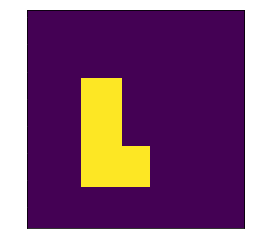

In [497]:
I = np.zeros((16,16),dtype=np.bool)
rr, cc = draw.rectangle((5, 4), extent=(5, 3), shape=I.shape)
I[rr, cc] = True
rr, cc = draw.rectangle((10, 4), extent=(3, 5), shape=I.shape)
I[rr, cc] = True
backup = I
plt.imshow(I)

In [498]:
SE = np.array([[1, 0],[1, 0],[1, 1]])
SE_o = np.array([2, 0])

In [499]:
eroded_I = np.zeros(I.shape)
dilated_I = np.zeros(I.shape)
I = np.pad(I,
           ((SE_o[0],SE_o[0]),(SE_o[1],SE_o[1])),
           mode='constant',
           constant_values=((False,False),(False,False)))

In [500]:
for i in range(SE_o[0], I.shape[0] - SE_o[0]):
    for j in range(SE_o[1], I.shape[1]- SE_o[1]):
        crop = I[i-SE_o[0]: i-SE_o[0]+SE.shape[0], j-SE_o[1]:j-SE_o[1]+SE.shape[1]]
        and_result = np.logical_and(crop,
                                    SE)
        erosion_test = np.sum(and_result) == np.sum(SE)
        dilation_test = np.sum(and_result) > 0

        eroded_I[i-SE_o[0],j-SE_o[1]] = erosion_test

        dilated_I[i-SE_o[0],j-SE_o[1]] = dilation_test

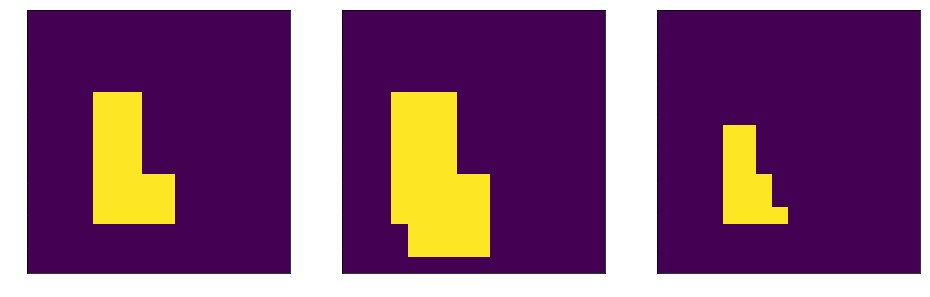

In [501]:
plt.figure(figsize=(16,10))
plt.subplot(131)
plt.imshow(backup)
plt.subplot(132)
plt.imshow(dilated_I)
plt.subplot(133)
plt.imshow(eroded_I)

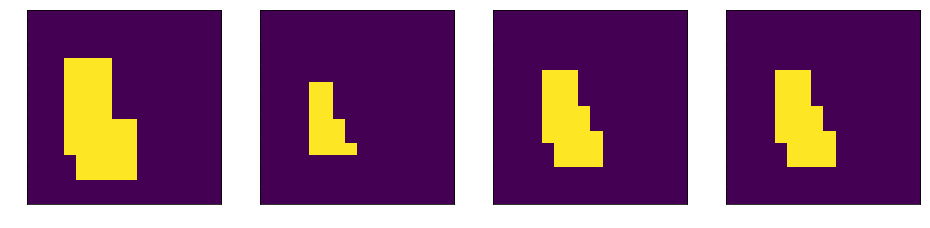

In [502]:
from skimage import morphology
#selem = morphology.selem.rectangle(3,2)

dilated_I = morphology.dilation(backup,SE)
eroded_I = morphology.erosion(backup,SE)
closed_I = morphology.closing(backup,SE)
open_I = morphology.opening(backup,SE)
plt.figure(figsize=(16,10))
plt.subplot(141)
plt.imshow(dilated_I)
plt.subplot(142)
plt.imshow(eroded_I)
plt.subplot(143)
plt.imshow(closed_I)
plt.subplot(144)
plt.imshow(open_I)

## Real world problem

Text(0.5, 1.0, 'Otsu thresh binary mask base on blue channel')

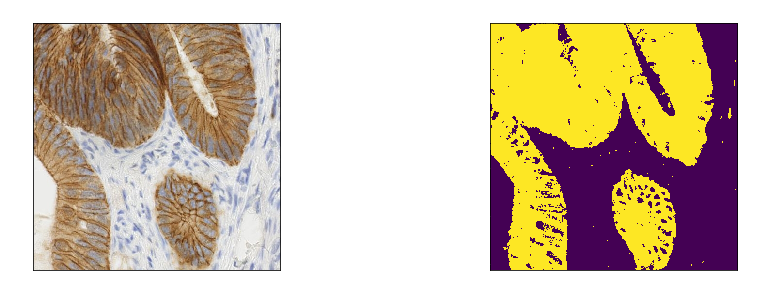

In [503]:
I3 =data.immunohistochemistry()

plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(I3)
plt.title('Image')
plt.subplot(222)
B = I3[:,:,2]
out  = filters.threshold_otsu(B)
mask = B<out
plt.imshow(mask)
plt.title('Otsu thresh binary mask base on blue channel')

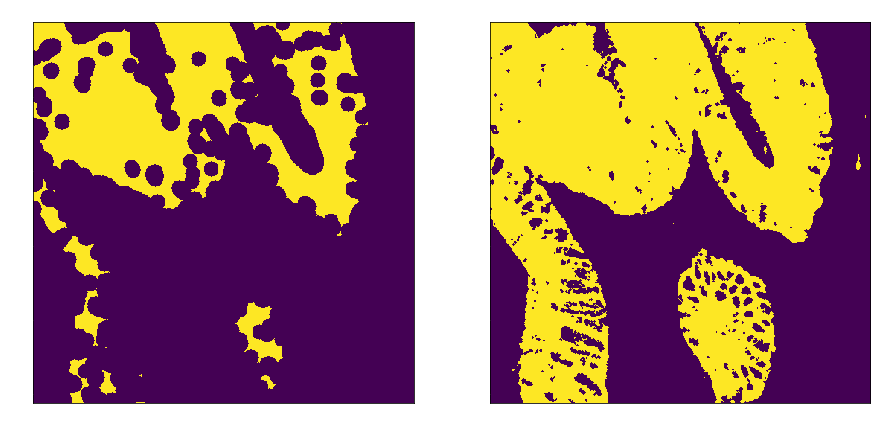

In [504]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Erosion 10 px disk')
plt.imshow(morphology.erosion(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Erosion 4 px disk')
plt.imshow(morphology.erosion(mask,morphology.disk(1)))

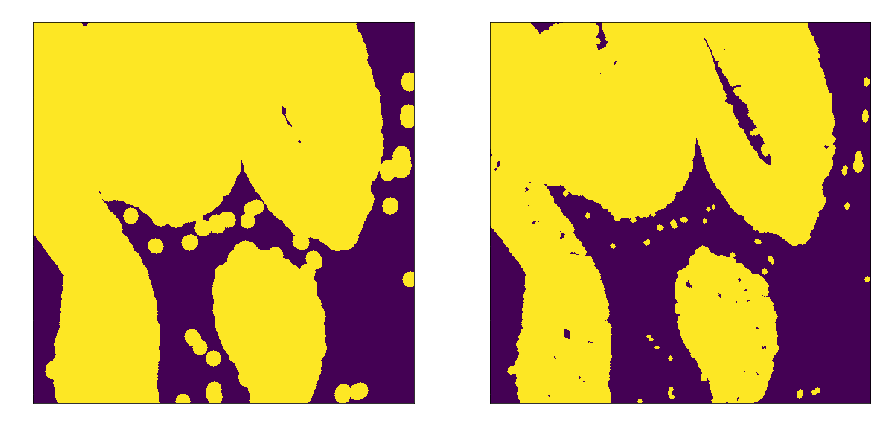

In [505]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Dilation 10 px disk')
plt.imshow(morphology.dilation(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Dilation 2 px disk')
plt.imshow(morphology.dilation(mask,morphology.disk(3)))

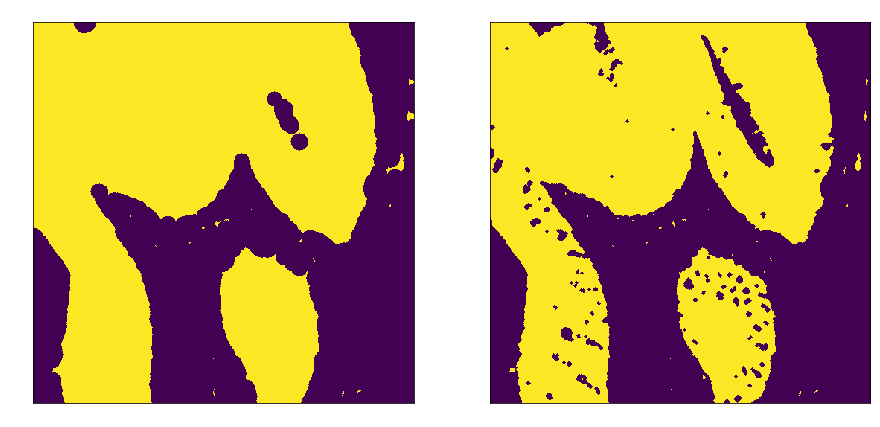

In [506]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.title('Closing 10 px disk')
plt.imshow(morphology.closing(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Closing 2 px disk')
plt.imshow(morphology.closing(mask,morphology.disk(2)))

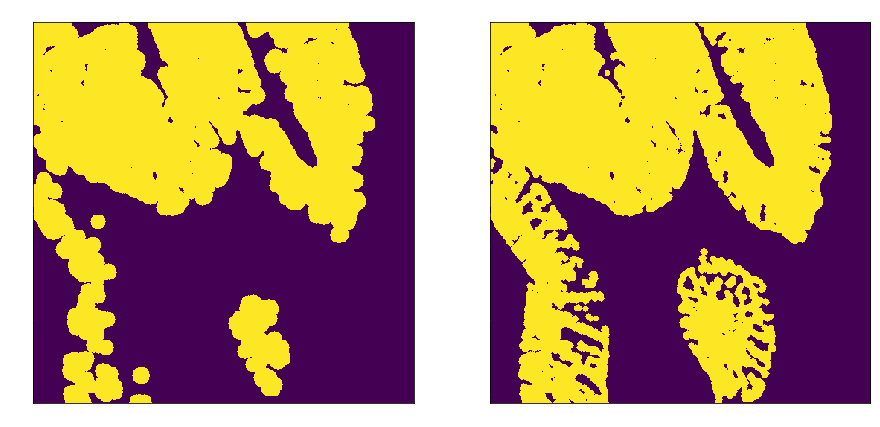

In [514]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.title('Opening 10 px disk')
plt.imshow(morphology.opening(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Opening 2 px disk')
plt.imshow(morphology.opening(mask,morphology.disk(4)))

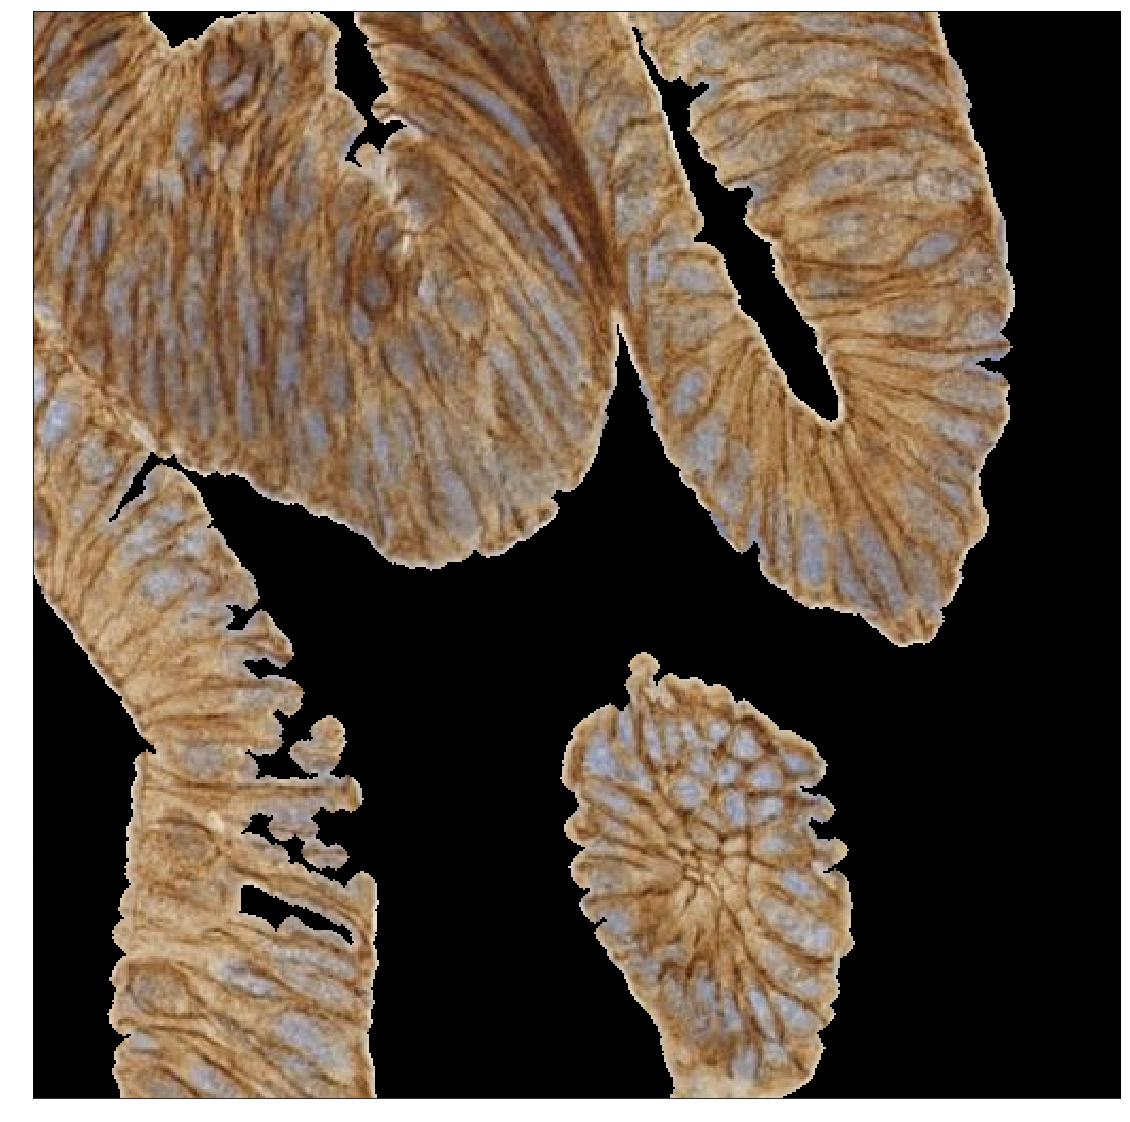

In [517]:
plt.figure(figsize=(20, 20))
mask_final = morphology.remove_small_holes(morphology.dilation(morphology.opening(mask,morphology.disk(4)),morphology.disk(2)),256)
plt.imshow(I3 * np.dstack((mask_final,mask_final,mask_final)),cmap='gray')

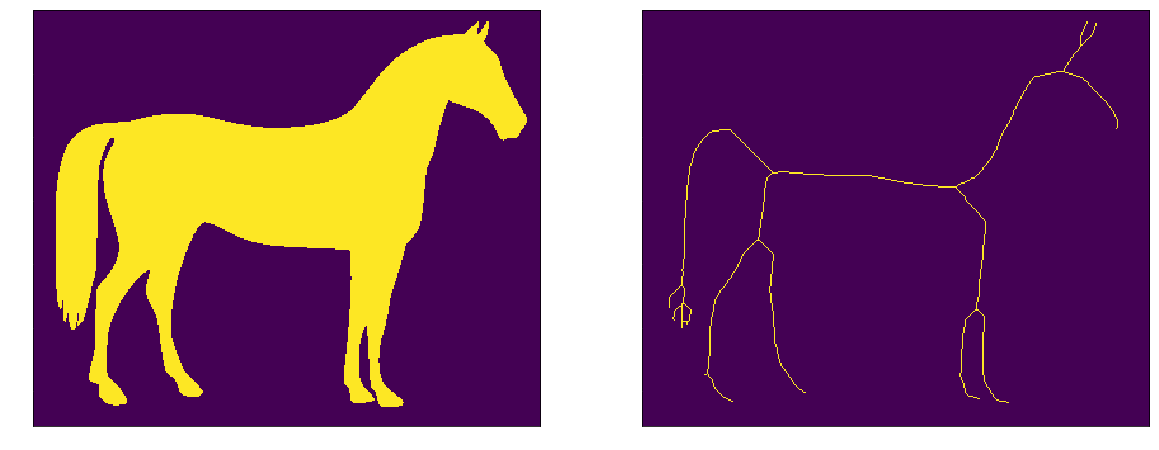

In [523]:
plt.figure(figsize=(20,15))
I = data.horse() == False
plt.subplot(121)
plt.imshow(I)
plt.subplot(122)
plt.imshow(morphology.skeletonize(I))


# Dokoncit cvicenie  54 -57